In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('../Annotation_Details - Thông tin khối u.csv')

In [4]:
df.head()

,Patient Number,Note,Breast Side,"Number of tumor (0,1,...)",Sex,Diagnosis,Subtype,Histologic grade,Breast Composition,Gross Feature,...,pr expression cd\n(pr_status = positive),pr expression level\n(pr_status = positive),her2 status,her2 expression cd,fish\n(her2_cd = 2),her2 expression level\n(her2_status = positive),ki67 status,ki67 cd\n(ki67_status = positive),ki67\n(ki67 status = positive),Note.1
0,1,NaN,Right side,NaN,Female,Invasive carcinoma of no special type,Triple negative,High,C,Mass only,...,NaN,NaN,Negative,0.0,NaN,NaN,Positive,NaN,90,bộ ba âm tính nhưng có tua gai
1,2,NaN,Left side,NaN,Female,Invasive carcinoma of no special type,Luminal B – HER2 (-),Intermediate,D,Mass + calcification,...,NaN,NaN,Negative,0.0,NaN,NaN,Positive,NaN,40,NaN
2,3,NaN,Right side,NaN,Female,Invasive carcinoma of no special type,Triple negative,High,C,Mass only,...,NaN,NaN,Negative,0.0,NaN,NaN,Negative,NaN,NaN,Birads 3 trên MLO
3,4,NaN,Left side,NaN,Female,Invasive carcinoma of no special type,Luminal B – HER2 (-),Intermediate,B,Mass only,...,1.0,5,Negative,0.0,NaN,NaN,Positive,1.0,20,NaN
4,5,NaN,Left side,NaN,Female,Invasive carcinoma of no special type,HER2 enriched,High,C,Mass only,...,NaN,NaN,Positive,3.0,NaN,NaN,Positive,NaN,40-50,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Patient Number                                  364 non-null    int64  
 1   Note                                            0 non-null      float64
 2   Breast Side                                     364 non-null    object 
 3   Number of tumor (0,1,...)                       0 non-null      float64
 4   Sex                                             364 non-null    object 
 5   Diagnosis                                       364 non-null    object 
 6   Subtype                                         364 non-null    object 
 7   Histologic grade                                364 non-null    object 
 8   Breast Composition                              364 non-null    object 
 9   Gross Feature                              

In [16]:
df.isnull().sum()

Patient Number                                       0
Note                                               364
Breast Side                                          0
Number of tumor (0,1,...)                          364
Sex                                                  0
Diagnosis                                            0
Subtype                                              0
Histologic grade                                     0
Breast Composition                                   0
Gross Feature                                        0
Mass Shape                                          44
Mass Margin                                         44
Mass Density                                        44
Architecture distortion                              1
Asymmetries                                          0
Calcification morphology                           209
Calcification distribution                         339
BI-RAD                                               0
Gross size

In [25]:
def get_total_null_amount(file_path):
    try:
        # Read the .csv file into a pandas DataFrame
        df = pd.read_csv(file_path)

        # Calculate the sum of null values for each column
        null_counts = df.isnull().sum()

        # Filter the Series to include only columns with more than 0 nulls
        nulls_to_report = null_counts[null_counts > 0]
        none_nulls = null_counts[null_counts == 0]

        return nulls_to_report, none_nulls

    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
        return pd.Series(dtype=int) # Return an empty Series
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.Series(dtype=int) # Return an empty Series

# 2. Call the function with the path to the file
file_location = '../Annotation_Details - Thông tin khối u.csv'
total_nulls, noneNull = get_total_null_amount(file_location)

# 3. Print the result
if not total_nulls.empty:
    print("Total null values in columns (ignoring columns with zero nulls):")
    print(total_nulls)
else:
    print("No columns with null values were found.")

Total null values in columns (ignoring columns with zero nulls):
Note                                               364
Number of tumor (0,1,...)                          364
Mass Shape                                          44
Mass Margin                                         44
Mass Density                                        44
Architecture distortion                              1
Calcification morphology                           209
Calcification distribution                         339
Classify subtype                                     6
er expression cd\n(er_status = positive)           102
er expression level\n(er_status = positive)        101
pr expression cd\n(pr_status = positive)           154
pr expression level\n(pr_status = positive)        154
her2 expression cd                                   1
fish\n(her2_cd = 2)                                325
her2 expression level\n(her2_status = positive)    364
ki67 status                                          1


In [27]:
print(noneNull)

Patient Number        0
Breast Side           0
Sex                   0
Diagnosis             0
Subtype               0
Histologic grade      0
Breast Composition    0
Gross Feature         0
Asymmetries           0
BI-RAD                0
Gross size            0
er status             0
pr status             0
her2 status           0
dtype: int64


In [33]:
import pandas as pd
from tabulate import tabulate

def get_missing_value_summary_table(file_path):
    """
    Calculates and prints a summary table of missing values for a CSV file.

    This function reads a CSV file, calculates the count and percentage of
    null values for each column, and prints the results in a formatted table.

    Args:
        file_path (str): The path to the .csv file.

    Returns:
        None: This function prints the output directly and does not return
              any value.
    """
    try:
        # Read the .csv file into a pandas DataFrame
        df = pd.read_csv(file_path)
        total_rows = len(df)

        if total_rows == 0:
            print("The CSV file is empty.")
            return

        # Calculate null counts and percentages
        null_counts = df.isnull().sum()
        percentage_missing = (null_counts / total_rows) * 100

        # Create the summary DataFrame
        summary_df = pd.DataFrame({
            'Null Count': null_counts,
            'Percentage Missing': percentage_missing
        })
        
        # Sort for better readability
        summary_df = summary_df.sort_values(by='Null Count', ascending=False)
        summary_df = summary_df[summary_df['Percentage Missing'] > 20]
        
        # Add a '%' sign and format the percentage column
        summary_df['Percentage Missing'] = summary_df['Percentage Missing'].map('{:.2f}%'.format)

        # Print the DataFrame as a formatted table
        # The .reset_index() is used to move the column names from the index into a column
        summary_df = summary_df.reset_index().rename(columns={'index': 'Column Name'})
        print("Summary of missing values per column:")
        print(tabulate(summary_df, headers='keys', tablefmt='psql', showindex=False))

    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
# 2. Call the function
file_location = '../Annotation_Details - Thông tin khối u.csv'
get_missing_value_summary_table(file_location)

Summary of missing values per column:
+----------------------------+--------------+----------------------+
| Column Name                |   Null Count | Percentage Missing   |
|----------------------------+--------------+----------------------|
| Note                       |          364 | 100.00%              |
| Number of tumor (0,1,...)  |          364 | 100.00%              |
| her2 expression level      |          364 | 100.00%              |
| (her2_status = positive)   |              |                      |
| ki67 cd                    |          358 | 98.35%               |
| (ki67_status = positive)   |              |                      |
| Calcification distribution |          339 | 93.13%               |
| fish                       |          325 | 89.29%               |
| (her2_cd = 2)              |              |                      |
| Note.1                     |          314 | 86.26%               |
| Calcification morphology   |          209 | 57.42%             

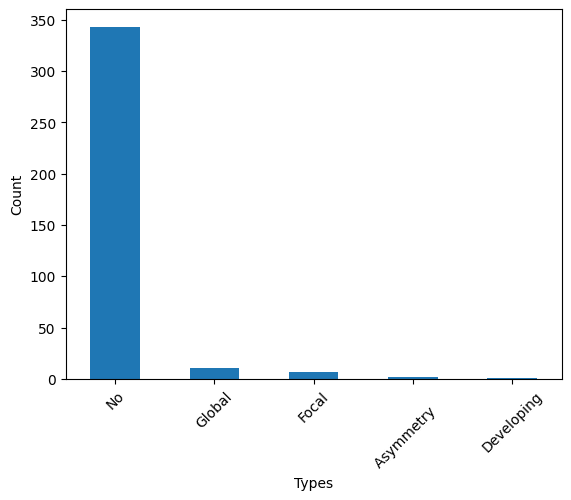

In [23]:
df['Asymmetries'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Types')
plt.ylabel('Count')
plt.show()

Strategy: Convert some potential textual column/feature into numerical <br/>
Histologic grade: Low | Intermediate | High ==> 0 | 1 | 2 <br/>
Asymmetries: maybe try someway to encode this <br/>
BI-RAD: Remove the term "BIRADS" <br/>
Keep Gross size <br/>
er status: neg/pos --> 0/1 <br/>
pr, her2 status: same with er <br/>


In [10]:
data = df.copy()